In [494]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import re
import nltk
from wordcloud import WordCloud
!pip install textblob
# Import necessary TextBlob components
from textblob import TextBlob, Word, Blobber
# Download the required corpora via NLTK
nltk.download('movie_reviews')  # Example corpus for sentiment analysis
nltk.download('punkt')  # Tokenizer for TextBlob
from sklearn.preprocessing import OneHotEncoder
# Ignore warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\osh31\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osh31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [495]:
# Loading the data sets (df_text from the data prep stage)
df2 = pd.read_pickle('df_after_eda2.pkl')
df_text = pd.read_pickle('text.pkl')

In [496]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   number_of_seasons   51372 non-null  float64       
 1   number_of_episodes  51372 non-null  float64       
 2   vote_count          51372 non-null  float64       
 3   vote_average        51372 non-null  float64       
 4   adult               51372 non-null  category      
 5   first_air_date      51372 non-null  datetime64[ns]
 6   last_air_date       51372 non-null  datetime64[ns]
 7   popularity          51372 non-null  float64       
 8   type                51372 non-null  string        
 9   status              51372 non-null  string        
 10  genres              51372 non-null  object        
 11  languages           51372 non-null  object        
 12  networks            51372 non-null  object        
 13  origin_country      51372 non-null  object        

# Feature Engineering

In [498]:
df2.head()

,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,popularity,type,status,genres,languages,networks,origin_country,episode_run_time
6,1.0,9.0,13053.0,7.831,False,2021-09-17,2025-03-15,115.587,Scripted,Returning Series,"['Other', 'Other', 'drama']","['en', 'ko', 'Other']",['netflix'],['kr'],0.0
9,1.0,9.0,11308.0,8.300,False,2021-01-15,2021-01-15,62.893,Miniseries,Ended,"['Other', 'Other', 'drama']",['en'],['Other'],['us'],0.0
12,1.0,12.0,10136.0,8.200,False,2021-06-09,2025-03-15,276.759,Scripted,Returning Series,"['drama', 'Other']",['en'],['Other'],['us'],52.0
14,1.0,24.0,9353.0,8.500,False,2019-11-12,2025-03-15,154.480,Scripted,Returning Series,"['Other', 'Other', 'drama']",['en'],['Other'],['us'],0.0
16,1.0,16.0,9008.0,8.353,False,2019-06-16,2025-03-15,197.456,Scripted,Returning Series,"['drama', 'Other']",['en'],['Other'],['us'],60.0


In [499]:
df_text.head()
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      51372 non-null  object
 1   overview  29404 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


# Text

## WORD CLOUD

In [502]:
# Converting to string
df_text['name'].astype('string')
df_text['overview'].astype('string')

6         Hundreds of cash-strapped players accept a str...
9         Wanda Maximoff and Vision—two super-powered be...
12        After stealing the Tesseract during the events...
14        After the fall of the Galactic Empire, lawless...
16        A group of high school students navigate love ...
                                ...                        
168591    Jenny and Ayush, two young adults studying at ...
168624    The story is about a unicorn who has lost his ...
168630                                                 <NA>
168633                                                 <NA>
168636    Murder, art and a journalist's relentless ques...
Name: overview, Length: 51372, dtype: string

5 most common words in "name" feature (movie)

Top 5 most common words: [('de', 1.0), ('Love', 0.9475218658892128), ('La', 0.39844509232264336), ('Le', 0.39844509232264336), ('World', 0.37998056365403304)]


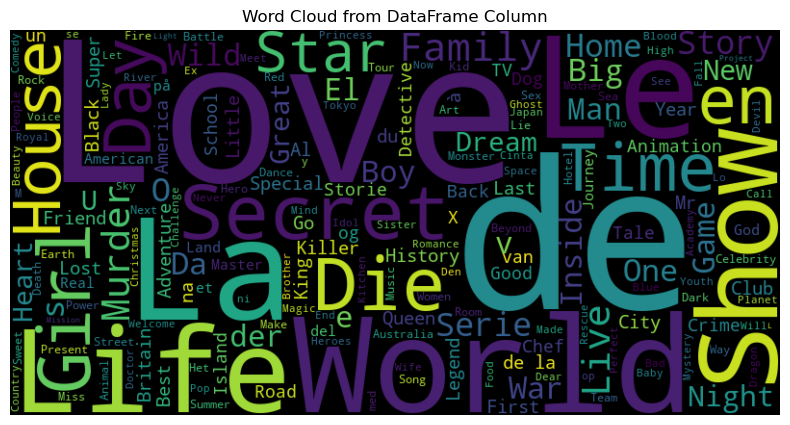

In [504]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud for "name" feature
text_data = df_text['name'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Extract the words and their frequencies from the word cloud
words_frequencies = wordcloud.words_

# Get the 5 most common words (top 5 by frequency)
top_5_words = list(words_frequencies.keys())[:5]
top_5_words_frequencies = [(word, words_frequencies[word]) for word in top_5_words]

# Print the top 5 words and their frequencies
print("Top 5 most common words:", top_5_words_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame Column")
plt.show()

In [505]:
# Creating 5 dummy columns for the "name" column based on the top 5 words
for word in top_5_words:
    # Using case-insensitive search for exact word matches (use \b for word boundary)
    df_text[f'name_contains_{word.lower()}'] = df_text['name'].str.contains(r'\b' + re.escape(word) + r'\b', case=False, na=False).astype(int)

# Checking the result
df_text[['name'] + [f'name_contains_{word.lower()}' for word in top_5_words]].head()

,name,name_contains_de,name_contains_love,name_contains_la,name_contains_le,name_contains_world
6,Squid Game,0,0,0,0,0
9,WandaVision,0,0,0,0,0
12,Loki,0,0,0,0,0
14,The Mandalorian,0,0,0,0,0
16,Euphoria,0,0,0,0,0


5 most common words in "overview" feature

Top 5 most common words: [('life', 1.0), ('will', 0.868657441126487), ('love', 0.8281136198106337), ('world', 0.7438698713279922), ('one', 0.7411993202233552)]


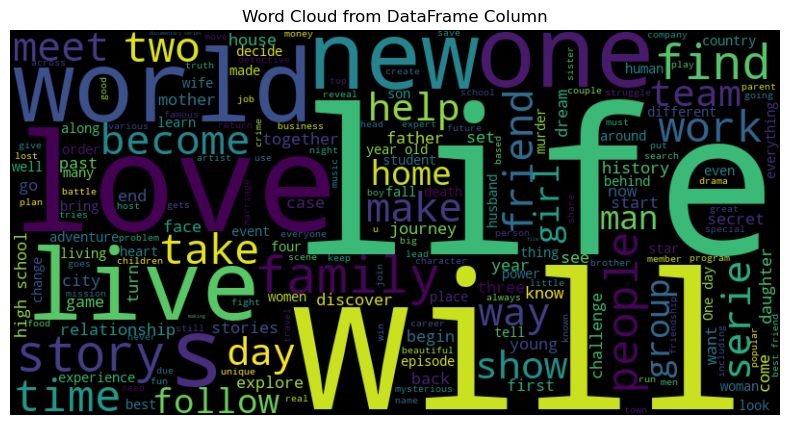

In [507]:
# Creating the word cloud for "overview" feature
text_data = df_text['overview'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Extracting the words and their frequencies from the word cloud
words_frequencies = wordcloud.words_

# Getting the 5 most common words (top 5 by frequency)
top_5_words = list(words_frequencies.keys())[:5]
top_5_words_frequencies = [(word, words_frequencies[word]) for word in top_5_words]

# Printing the top 5 words and their frequencies
print("Top 5 most common words:", top_5_words_frequencies)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame Column")
plt.show()

In [508]:
# Create 5 dummy columns for the "overview" column based on the top 5 words
for word in top_5_words:
    # Use case-insensitive search for exact word matches (use \b for word boundary)
    df_text[f'name_contains_{word.lower()}'] = df_text['overview'].str.contains(r'\b' + re.escape(word) + r'\b', case=False, na=False).astype(int)

# Check the result
df_text[['overview'] + [f'name_contains_{word.lower()}' for word in top_5_words]].head()

,overview,name_contains_life,name_contains_will,name_contains_love,name_contains_world,name_contains_one
6,Hundreds of cash-strapped players accept a str...,0,0,0,0,0
9,Wanda Maximoff and Vision—two super-powered be...,0,0,0,0,0
12,After stealing the Tesseract during the events...,0,0,0,0,0
14,"After the fall of the Galactic Empire, lawless...",0,0,0,0,0
16,A group of high school students navigate love ...,0,0,1,1,0


# Sentiment Analysis

## Analyzing the sentiment of each movie "name" 

In [511]:
n = df_text.shape[0]
dfsent = {}

for i in range(0, n):
    movie = df_text.iloc[i]['name']  # Use iloc for positional indexing
    ### Preprocessing
    text = df_text.iloc[i]['name']
    
    # Skip movies with empty overview or invalid text (convert non-strings to empty string)
    if isinstance(text, str) and text != "":
        text = TextBlob(text)
        ### Tokenizing
        dfsent[movie] = [text.sentiment[0], text.sentiment[1]]
    else:
        dfsent[movie] = [None, None]  # Handle empty or invalid overview


In [512]:
dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['polarity','subjectivity']

In [513]:
dfsent.head()

,polarity,subjectivity
Squid Game,-0.4,0.4
WandaVision,0.0,0.0
Loki,0.0,0.0
The Mandalorian,0.0,0.0
Euphoria,0.0,0.0


In [514]:
# dfsent['sentiment'] = [1 if dfsent.polarity > 0 else -1 if dfsent.polarity < 0 else 0]
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity<0,'sentiment'] = -1
dfsent.loc[dfsent.polarity>0,'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

In [515]:
dfsent.head()

,polarity,subjectivity,sentiment
Squid Game,-0.4,0.4,-1
WandaVision,0.0,0.0,0
Loki,0.0,0.0,0
The Mandalorian,0.0,0.0,0
Euphoria,0.0,0.0,0


In [516]:
dfsent.dtypes

polarity         float64
subjectivity     float64
sentiment       category
dtype: object

In [517]:
[dfsent.groupby('sentiment').count()]

[           polarity  subjectivity
 sentiment                        
 -1             2248          2248
  0            43400         43400
  1             4641          4641]

In [518]:
sentiment_a =dfsent.groupby('sentiment').count()['polarity']
sentiment_a

sentiment
-1     2248
 0    43400
 1     4641
Name: polarity, dtype: int64

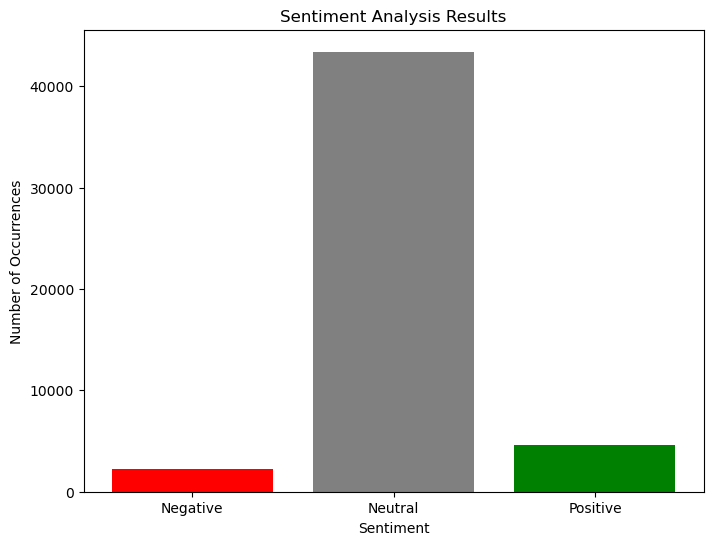

In [519]:
# Assuming the data is stored in a dictionary or pandas Series
sentiment_data = {-1: 2248, 0: 43400, 1: 4641}
# Extract keys and values
labels = ['Negative', 'Neutral', 'Positive']
values = [sentiment_data[-1], sentiment_data[0], sentiment_data[1]]

# Create a bar plot for sentiment analysis
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.title('Sentiment Analysis Results')
plt.show()

In [520]:
# Calculating the total number of occurrences
total_occurrences = sum(sentiment_data.values())
# Calculating the weighted average
weighted_average = sum(score * count for score, count in sentiment_data.items()) / total_occurrences
weighted_average

0.04758495893734216

Result - the sentiment for movie's name is neutral

## Analyzing the sentiment of each "overview" 

In [523]:
n = df_text.shape[0]
dfsent = {}

for i in range(0, n):
    movie = df_text.iloc[i]['name']  # Use iloc for positional indexing
    # Preprocessing
    text = df_text.iloc[i]['overview']
    
    # Skipping movies with empty overview or invalid text (convert non-strings to empty string)
    if isinstance(text, str) and text != "":
        text = TextBlob(text)
        # Tokenizing
        dfsent[movie] = [text.sentiment[0], text.sentiment[1]]
    else:
        dfsent[movie] = [None, None]  # Handling empty or invalid overview

In [524]:
dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['polarity','subjectivity']

In [525]:
# dfsent['sentiment'] = [1 if dfsent.polarity > 0 else -1 if dfsent.polarity < 0 else 0]
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity<0,'sentiment'] = -1
dfsent.loc[dfsent.polarity>0,'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

In [526]:
dfsent.head()

,polarity,subjectivity,sentiment
Squid Game,0.055,0.345,1
WandaVision,0.0,0.0,0
Loki,0.075,0.385,1
The Mandalorian,0.0,0.0,0
Euphoria,0.231111,0.402222,1


In [527]:
dfsent.dtypes

polarity          object
subjectivity      object
sentiment       category
dtype: object

In [528]:
[dfsent.groupby('sentiment').count()]

[           polarity  subjectivity
 sentiment                        
 -1             6304          6304
  0             3784          3784
  1            18495         18495]

In [529]:
sentiment_a =dfsent.groupby('sentiment').count()['polarity']
sentiment_a

sentiment
-1     6304
 0     3784
 1    18495
Name: polarity, dtype: int64

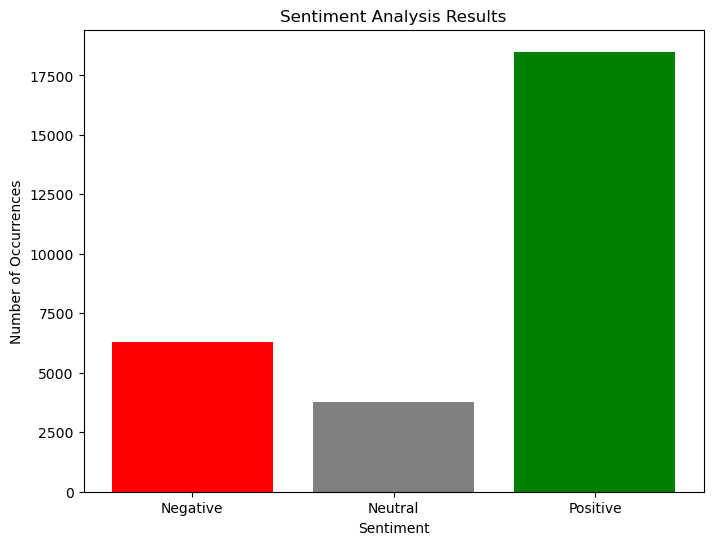

In [530]:
# Assuming the data is stored in a dictionary or pandas Series
sentiment_data = {-1: 6304, 0: 3784, 1: 18495}
# Extract keys and values
labels = ['Negative', 'Neutral', 'Positive']
values = [sentiment_data[-1], sentiment_data[0], sentiment_data[1]]

# Creating a bar plot for sentiment analysis
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.title('Sentiment Analysis Results')
plt.show()

In [531]:
# Calculating the total number of occurrences
total_occurrences = sum(sentiment_data.values())
# Calculate the weighted average
weighted_average = sum(score * count for score, count in sentiment_data.items()) / total_occurrences
weighted_average

0.42651226253367386

Result - the sentiment for overview is positive

In [533]:
# Converting 'category' columns to 'object' type in df2 before adding new columns
df2 = df2.apply(lambda x: x.astype('object') if x.dtype.name == 'category' else x)

# Creating 5 dummy columns for the "name" column based on the top 5 words
for word in top_5_words:
    df_text[f'name_contains_{word.lower()}'] = df_text['name'].str.contains(r'\b' + re.escape(word) + r'\b', case=False, na=False).astype(int)

# Creating 5 dummy columns for the "overview" column based on the top 5 words
for word in top_5_words:
    df_text[f'overview_contains_{word.lower()}'] = df_text['overview'].str.contains(r'\b' + re.escape(word) + r'\b', case=False, na=False).astype(int)

# Dropping the old columns from df2 (if they exist) to avoid duplicates
df2 = df2.drop(columns=[f'name_contains_{word.lower()}' for word in top_5_words] + 
                 [f'overview_contains_{word.lower()}' for word in top_5_words], errors='ignore')

# Renaming new columns in df_text to avoid conflict with existing ones in df2
for word in top_5_words:
    df_text[f'name_contains_{word.lower()}_new'] = df_text[f'name_contains_{word.lower()}']
    df_text[f'overview_contains_{word.lower()}_new'] = df_text[f'overview_contains_{word.lower()}']

# Joining the new columns from df_text into df2 with '_new' suffix to avoid duplicates
df2 = df2.join(df_text[[f'name_contains_{word.lower()}_new' for word in top_5_words] + 
                       [f'overview_contains_{word.lower()}_new' for word in top_5_words]], 
               how='left')

# Replacing NaN values with 0 in df2
df2 = df2.fillna(0)

In [534]:
df2.head(100)

,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,popularity,type,status,...,name_contains_life_new,name_contains_will_new,name_contains_love_new,name_contains_world_new,name_contains_one_new,overview_contains_life_new,overview_contains_will_new,overview_contains_love_new,overview_contains_world_new,overview_contains_one_new
6,1.0,9.0,13053.0,7.831,False,2021-09-17,2025-03-15,115.587,Scripted,Returning Series,...,0,0,0,0,0,0,0,0,0,0
9,1.0,9.0,11308.0,8.300,False,2021-01-15,2021-01-15,62.893,Miniseries,Ended,...,0,0,0,0,0,0,0,0,0,0
12,1.0,12.0,10136.0,8.200,False,2021-06-09,2025-03-15,276.759,Scripted,Returning Series,...,0,0,0,0,0,0,0,0,0,0
14,1.0,24.0,9353.0,8.500,False,2019-11-12,2025-03-15,154.480,Scripted,Returning Series,...,0,0,0,0,0,0,0,0,0,0
16,1.0,16.0,9008.0,8.353,False,2019-06-16,2025-03-15,197.456,Scripted,Returning Series,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,34.0,1260.0,8.477,False,2020-08-14,2025-03-15,102.723,Scripted,Returning Series,...,0,0,0,0,0,0,1,0,0,0
299,1.0,20.0,1260.0,8.600,False,2019-10-08,2025-03-15,35.237,Scripted,Returning Series,...,0,0,0,0,0,0,0,0,1,0
304,1.0,47.0,1245.0,8.622,False,2019-07-05,2025-03-15,33.218,Scripted,Returning Series,...,0,0,0,0,0,0,0,0,1,1
306,1.0,12.0,1242.0,8.626,False,2022-10-12,2022-10-12,96.136,Scripted,Ended,...,0,0,0,0,0,1,0,0,0,0


## Date type handling

Splitting Date features to year and month

In [537]:
# Splitting the 'first_air_date' and 'last_air_date' columns into year and month
df2['first_air_year'] = df2['first_air_date'].dt.year
df2['first_air_month'] = df2['first_air_date'].dt.month

df2['last_air_year'] = df2['last_air_date'].dt.year
df2['last_air_month'] = df2['last_air_date'].dt.month

# Ensuring the year and month columns are of integer type
df2['first_air_year'] = df2['first_air_year'].astype(int)
df2['first_air_month'] = df2['first_air_month'].astype(int)

df2['last_air_year'] = df2['last_air_year'].astype(int)
df2['last_air_month'] = df2['last_air_month'].astype(int)

# Verifying the changes
df2[['first_air_year', 'first_air_month', 'last_air_year', 'last_air_month']].head()

,first_air_year,first_air_month,last_air_year,last_air_month
6,2021,9,2025,3
9,2021,1,2021,1
12,2021,6,2025,3
14,2019,11,2025,3
16,2019,6,2025,3


In [538]:
# Dropping the 'first_air_date' and 'last_air_date' columns from df2
df2 = df2.drop(['first_air_date', 'last_air_date'], axis=1)

In [539]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_seasons            51372 non-null  float64
 1   number_of_episodes           51372 non-null  float64
 2   vote_count                   51372 non-null  float64
 3   vote_average                 51372 non-null  float64
 4   adult                        51372 non-null  bool   
 5   popularity                   51372 non-null  float64
 6   type                         51372 non-null  string 
 7   status                       51372 non-null  string 
 8   genres                       51372 non-null  object 
 9   languages                    51372 non-null  object 
 10  networks                     51372 non-null  object 
 11  origin_country               51372 non-null  object 
 12  episode_run_time             51372 non-null  float64
 13  name_contains_life_n

## Categorical type handling (genres, networks, language, origin_country)

One-Hot Encoding (dummies)

In [542]:
# Splitting 'genres', 'networks', 'languages' and 'origin_country' columns into lists (if they are not already in list format)
df2['genres'] = df2['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df2['networks'] = df2['networks'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df2['languages'] = df2['languages'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df2['origin_country'] = df2['origin_country'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Creating unique genres, networks, languages, and origin_country (case-insensitive and stripped of spaces)
unique_genres = set([genre.strip().lower() for genres in df2['genres'] for genre in genres])
unique_networks = set([network.strip().lower() for networks in df2['networks'] for network in networks])
unique_languages = set([language.strip().lower() for languages in df2['languages'] for language in languages])
unique_origin_countries = set([country.strip().lower() for countries in df2['origin_country'] for country in countries])

# Creating dummy columns for genres, cleaning the column names
for genre in unique_genres:
    genre_clean = genre.replace("'", "").replace("[", "").replace("]", "")
    df2[f'genre_{genre_clean}'] = df2['genres'].apply(lambda x: 1 if genre in x else 0)

# Creating dummy columns for networks, cleaning the column names
for network in unique_networks:
    network_clean = network.replace("'", "").replace("[", "").replace("]", "")
    df2[f'network_{network_clean}'] = df2['networks'].apply(lambda x: 1 if network in x else 0)

# Creating dummy columns for languages, cleaning the column names
for language in unique_languages:
    language_clean = language.replace("'", "").replace("[", "").replace("]", "")
    df2[f'language_{language_clean}'] = df2['languages'].apply(lambda x: 1 if language in x else 0)

# Creating dummy columns for origin_country, cleaning the column names
for country in unique_origin_countries:
    country_clean = country.replace("'", "").replace("[", "").replace("]", "")
    df2[f'origin_country_{country_clean}'] = df2['origin_country'].apply(lambda x: 1 if country in x else 0)

# Removing duplicate columns (in case there are duplicates due to minor variations)
df2 = df2.loc[:, ~df2.columns.duplicated()]

# Checking the result
print("\nDataFrame shape after processing:")
print(df2.shape)
print("\nColumns after removing duplicates:")
print(df2.columns)


DataFrame shape after processing:
(51372, 66)

Columns after removing duplicates:
Index(['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average',
       'adult', 'popularity', 'type', 'status', 'genres', 'languages',
       'networks', 'origin_country', 'episode_run_time',
       'name_contains_life_new', 'name_contains_will_new',
       'name_contains_love_new', 'name_contains_world_new',
       'name_contains_one_new', 'overview_contains_life_new',
       'overview_contains_will_new', 'overview_contains_love_new',
       'overview_contains_world_new', 'overview_contains_one_new',
       'first_air_year', 'first_air_month', 'last_air_year', 'last_air_month',
       'genre_reality', 'genre_documentary', 'genre_comedy', 'genre_other',
       'genre_animation', 'genre_drama', 'network_netflix', 'network_youku',
       'network_discovery+', 'network_channel 4', 'network_iqiyi',
       'network_prime video', 'network_channel 5', 'network_youtube',
       'network_tokyo mx'

In [543]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_seasons            51372 non-null  float64
 1   number_of_episodes           51372 non-null  float64
 2   vote_count                   51372 non-null  float64
 3   vote_average                 51372 non-null  float64
 4   adult                        51372 non-null  bool   
 5   popularity                   51372 non-null  float64
 6   type                         51372 non-null  string 
 7   status                       51372 non-null  string 
 8   genres                       51372 non-null  object 
 9   languages                    51372 non-null  object 
 10  networks                     51372 non-null  object 
 11  origin_country               51372 non-null  object 
 12  episode_run_time             51372 non-null  float64
 13  name_contains_life_n

In [544]:
# Dropping the 'languages', 'genres', 'networks' and 'origin_country' columns from df2
df2 = df2.drop(['genres', 'networks', 'languages', 'origin_country'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_seasons            51372 non-null  float64
 1   number_of_episodes           51372 non-null  float64
 2   vote_count                   51372 non-null  float64
 3   vote_average                 51372 non-null  float64
 4   adult                        51372 non-null  bool   
 5   popularity                   51372 non-null  float64
 6   type                         51372 non-null  string 
 7   status                       51372 non-null  string 
 8   episode_run_time             51372 non-null  float64
 9   name_contains_life_new       51372 non-null  int32  
 10  name_contains_will_new       51372 non-null  int32  
 11  name_contains_love_new       51372 non-null  int32  
 12  name_contains_world_new      51372 non-null  int32  
 13  name_contains_one_ne

Label Encoding for "status", "type" and "adult" features

In [546]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to 'status', 'type' and 'adult' columns
df2['status'] = label_encoder.fit_transform(df2['status'])
df2['type'] = label_encoder.fit_transform(df2['type'])
df2['adult'] = label_encoder.fit_transform(df2['adult'])

# Checking the updated DataFrame
print("\nDataFrame with label encoding applied to 'status', 'type', and 'adult':")
df2[['status', 'type', 'adult']].head()


DataFrame with label encoding applied to 'status', 'type', and 'adult':


,status,type,adult
6,5,4,0
9,1,1,0
12,5,4,0
14,5,4,0
16,5,4,0


In [547]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_seasons            51372 non-null  float64
 1   number_of_episodes           51372 non-null  float64
 2   vote_count                   51372 non-null  float64
 3   vote_average                 51372 non-null  float64
 4   adult                        51372 non-null  int64  
 5   popularity                   51372 non-null  float64
 6   type                         51372 non-null  int32  
 7   status                       51372 non-null  int32  
 8   episode_run_time             51372 non-null  float64
 9   name_contains_life_new       51372 non-null  int32  
 10  name_contains_will_new       51372 non-null  int32  
 11  name_contains_love_new       51372 non-null  int32  
 12  name_contains_world_new      51372 non-null  int32  
 13  name_contains_one_ne

In [548]:
df2.head(10)

,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,popularity,type,status,episode_run_time,name_contains_life_new,...,origin_country_cn,origin_country_jp,origin_country_in,origin_country_fr,origin_country_de,origin_country_kr,origin_country_gb,origin_country_ca,origin_country_other,origin_country_us
6,1.0,9.0,13053.0,7.831,0,115.587,4,5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,9.0,11308.0,8.300,0,62.893,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
12,1.0,12.0,10136.0,8.200,0,276.759,4,5,52.0,0,...,0,0,0,0,0,0,0,0,0,1
14,1.0,24.0,9353.0,8.500,0,154.480,4,5,0.0,0,...,0,0,0,0,0,0,0,0,0,1
16,1.0,16.0,9008.0,8.353,0,197.456,4,5,60.0,0,...,0,0,0,0,0,0,0,0,0,1
17,1.0,32.0,8891.0,8.604,0,51.859,4,5,0.0,0,...,0,0,0,0,0,0,0,0,0,1
19,1.0,49.0,8817.0,8.071,0,100.711,4,5,50.0,0,...,0,0,0,0,0,0,0,0,0,0
20,1.0,32.0,8721.0,8.474,0,256.856,4,5,60.0,0,...,0,0,0,0,0,0,0,0,0,1
23,1.0,6.0,8008.0,7.693,0,35.521,1,1,50.0,0,...,0,0,0,0,0,0,0,0,0,1
26,1.0,8.0,7506.0,8.548,0,164.275,4,5,0.0,0,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection

## Hyperparameters - Multivariable Analysis

In [551]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge

In [552]:
y=df2['popularity']
X=df2.drop(columns=['popularity'])

In [553]:
# Fitting models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=5).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

ridge = Ridge(alpha=5).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Creating a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected, 
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Summing the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'GradientBoost', 'RandomForest','Ridge']].sum(axis=1)

# Output the results
selection_df

,Feature,Lasso,GradientBoost,RandomForest,Ridge,Sum
0,number_of_seasons,0,0,0,0,0
1,number_of_episodes,1,1,1,1,4
2,vote_count,1,1,1,1,4
3,vote_average,1,1,1,1,4
4,adult,0,1,1,1,3
...,...,...,...,...,...,...
56,origin_country_kr,0,0,0,0,0
57,origin_country_gb,0,1,1,1,3
58,origin_country_ca,0,0,0,0,0
59,origin_country_other,0,0,0,0,0


# Creating Data Frame with most valuable features 

Selected variables - recommended by at least 3 models (4 "judges" gave low amount of features - less than 15)

In [556]:
# Selecting variables with a sum of selections >= 3
final_var = selection_df[selection_df['Sum'] >= 3]['Feature'].tolist()
df_model = df2[final_var].copy()
df_model['popularity'] = df2['popularity'].copy()

# Output the results
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_episodes          51372 non-null  float64
 1   vote_count                  51372 non-null  float64
 2   vote_average                51372 non-null  float64
 3   adult                       51372 non-null  int64  
 4   type                        51372 non-null  int32  
 5   status                      51372 non-null  int32  
 6   episode_run_time            51372 non-null  float64
 7   name_contains_love_new      51372 non-null  int32  
 8   name_contains_world_new     51372 non-null  int32  
 9   name_contains_one_new       51372 non-null  int32  
 10  overview_contains_life_new  51372 non-null  int32  
 11  overview_contains_love_new  51372 non-null  int32  
 12  first_air_year              51372 non-null  int32  
 13  first_air_month             51372 n

df2.to_pickle('df_after_eda2.pkl')

In [558]:
df2.to_pickle('df_after_fs.pkl')

**Note: the "dummies"/"label encoding" processes was done before the categories because using 'Ridge' and 'Lasso' required encoding the features (converting from categorical to numerical); otherwise, an error would occur.